# Analysis of Shark attacks and associated fatality
This analysis aims to answer the following questions:
- Did shark attacks change over past 100 years? How did the fatal incidents change over the given period?
- What type of attack is associated with shark attacks?
- In what countries do shark attacks happen the most often? What proportion of them are deadly?
- What activity is the most dangerous, in relation to likelihood of shark attack? Which of them is most likely to be associated with deadly incident?
- What kind of people, in terms of age and sex, get attacked more often?
- Is there seasonal and daily patterns in shark attacks?
- What shark species attack?

### Analytical  steps:
1. Import all necessary libraries
2. Import data used in analysis, explore the data, clean the columns not informative for this project
3. Data cleaning
4. Dealing with missing values
5. Visualise and analyse each variable in relationship to analytical questions stated above
6. Data derivation
7. Conclusion

### Step 1. Import libraries

In [108]:
import numpy as np
import pandas as pd 
import altair as alt
import matplotlib.pyplot as plt
from vega_datasets import data
alt.renderers.enable('html')

RendererRegistry.enable('html')

### Step 2. Import data and explore it 

In [109]:
sharks_attacks=pd.read_excel('GSAF5.xls')
sharks_attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2021.09.10,10-Sep-2021,2021.0,NaN,EGYPT,NaN,Sidi Abdel Rahmen,Swimming,Mohamed,M,...,No shark invovlement,Dr. M. Fouda & M. Salrm,2021.09.10-Mohamed.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.09.10,2021.09.10,6700.0,NaN,NaN
1,2021.09.09,09-Sep-2021,2021.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Doyle Neilsen,M,...,NaN,"Daytona Beach News-Journal, 9/14/2021",2021.09.09-Neilsen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.09.09,2021.09.09,6699.0,NaN,NaN
2,2021.09.05,05-Sep-2021,2021.0,Unprovoked,AUSTRALIA,New South Wales,Emerald Beach,Surfing,Timothy Thompson,M,...,White xhark,"B. Myatt, GSAF",2021.09.05-Thompson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.09.05,2021.09.05,6698.0,NaN,NaN
3,2021.09.03.b,03-Sep-2021,2021.0,Unprovoked,British Overseas Territory,Turks and Caicos,NaN,NaN,male,M,...,NaN,Anonymous,2021.09.03.b-TurksCaicos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.09.03.b,2021.09.03.b,6697.0,NaN,NaN
4,2021.08.28,28-Aug-2021,2021.0,Unprovoked,USA,Texas,"Galveston Island, Galveston County",Boogie boarding,male,M,...,NaN,"T. Craig, GSAF & K. McMurray, TrackingShark.com",2021.08.28.-Galveston.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.08.28,2021.08.28,6696.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From presenting the data, we observe that there are lots of empty cells.This is due to the nature of data logging. The dataset is updated each time someone reports the attack and the incident is added to this dataset, therefore the creators have left some empty cells. For the purpose of this study, we wish to analyse attacks that happened in recent years and have more detailed information. For example, some cells record information about attacks that took place in years B.C. 
Therefore, we reduce the dataset to the past 100 years.

In [110]:
attacks_100years=sharks_attacks[sharks_attacks['Year']>=1920]

Secondly, the data consists of 24 columns, some of them are not informative for the purpose of this project, e.g links and pdf. We remove them along with other uninformative columns

In [111]:
attacks_cleaned=attacks_100years.drop(['Date','Area','Location','Injury','Name','Investigator or Source','pdf',
                                      'href formula','href','Case Number.1','Case Number.2',
                                      'original order','Unnamed: 22','Unnamed: 23'],axis=1)
attacks_cleaned

,Case Number,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Time,Species
0,2021.09.10,2021.0,NaN,EGYPT,Swimming,M,NaN,NaN,NaN,No shark invovlement
1,2021.09.09,2021.0,Unprovoked,USA,Surfing,M,!6,N,13h20,NaN
2,2021.09.05,2021.0,Unprovoked,AUSTRALIA,Surfing,M,31,Y,10h30,White xhark
3,2021.09.03.b,2021.0,Unprovoked,British Overseas Territory,NaN,M,NaN,N,NaN,NaN
4,2021.08.28,2021.0,Unprovoked,USA,Boogie boarding,M,!!,N,11h45,NaN
...,...,...,...,...,...,...,...,...,...,...
5649,1920.01.24.R.a,1920.0,Unprovoked,AUSTRALIA,Free diving,M,NaN,Y,NaN,NaN
5650,1920.01.15,1920.0,Unprovoked,AUSTRALIA,Swimming,M,12,Y,10h00,NaN
5651,1920.00.00.b,1920.0,Unprovoked,JAMAICA,Jumped overboard,M,NaN,Y,NaN,NaN
5652,1920.00.00.b,1920.0,Unprovoked,NEW ZEALAND,NaN,F,NaN,N,NaN,NaN


Thirdly, we also observed that data is very text heavy and "dirty" (contains lots of typos and unrelated information). Therefore, the intense data cleaning  and preparation of these entries is required. Due to difficulty of identifying each entry and time required for this task, we will try to avoid any manual cell transfomations. All data cleaning is presented in the next step.

### Step 3 . Data Cleaning

We begin with exploring date, an important variable for identifying seasonal trends of shark attacks. We removed 'Date' in favour of 'Case Number',since it is recorded in the format that is easier to transform into the variable of our interest. We extract month from this column. It is separated by dot on each side. 

In [112]:
attacks_cleaned['Month']=attacks_cleaned['Case Number'].str.extract('\.([0-9]+)\.')
attacks_cleaned['Month']=attacks_cleaned['Month'].dropna().astype(int)

We notice that there are values for month that are recorded as 0 and some are larger than 12, these are erroneous and therefore we remove them.

In [113]:
attacks_cleaned['Month']=attacks_cleaned[(attacks_cleaned['Month']>0)&(attacks_cleaned['Month']<13)]['Month']

Additionally, we explore time as we are interested in daily trends. The column for time is also recorded as an object and does not have a set format for time. Most entries are recorded in 00h00 format. We extract first intergers before 'h'. 

In [114]:
attacks_cleaned['Time']=attacks_cleaned['Time'].str.extract('([0-9]+)')
attacks_cleaned['Time']=attacks_cleaned['Time'].dropna().astype(int)  

Some of the entries do not fit into 24 hour period, so we remove all entries that are less than 24.

In [115]:
attacks_cleaned['Time']=attacks_cleaned[attacks_cleaned['Time']<=24]['Time']

Next, we observe type of attacks and perform all required cleaning.

In [116]:
pd.unique(attacks_cleaned['Type'])

array([nan, 'Unprovoked', 'Provoked', 'Watercraft', 'Questionable',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Sea Disaster', 'Boat'], dtype=object)

This is a relatively clean column and only some replacements are needed

In [117]:
attacks_cleaned['Type'] = attacks_cleaned['Type'].str.replace('Boat','Watercraft')
attacks_cleaned['Type'] = attacks_cleaned['Type'].str.replace('Questionable','Unknown')
attacks_cleaned['Type'] = attacks_cleaned['Type'].str.replace('Invalid','Unknown')
attacks_cleaned['Type'] = attacks_cleaned['Type'].str.replace('Unconfirmed','Unknown')
attacks_cleaned['Type'] = attacks_cleaned['Type'].str.replace('Under investigation','Unknown')
attacks_cleaned['Type'] = attacks_cleaned['Type'].str.replace('Unverified','Unknown')
attacks_cleaned['Type'] = attacks_cleaned['Type'].fillna('Unknown')
pd.unique(attacks_cleaned['Type'])

array(['Unknown', 'Unprovoked', 'Provoked', 'Watercraft', 'Sea Disaster'],
      dtype=object)

Now, we will deal with countries. The data in this column has two problems. 1. Some of the entries are recorded in small cases, whereas the majority of cells are in upper cases. We try to replace it. 2. There exists '?' in some entries, we assume that the place stated is correct and remove '?' from the column.

In [118]:
pd.unique(attacks_cleaned['Country'])

array(['EGYPT', 'USA', 'AUSTRALIA', 'British Overseas Territory',
       'CANADA', 'BRAZIL', 'THAILAND', 'SOUTH AFRICA', 'BAHAMAS',
       'ECUADOR', 'JORDAN', 'ENGLAND', 'NEW CALEDONIA', 'JAMAICA',
       'FRENCH POLYNESIA', 'NEW ZEALAND', 'ST KITTS / NEVIS', 'MALDIVES',
       'ST MARTIN', 'SPAIN', 'FIJI', 'SEYCHELLES', 'PAPUA NEW GUINEA',
       'REUNION ISLAND', 'MEXICO', 'ISRAEL', 'CHINA', 'SAMOA', 'IRELAND',
       'ITALY', 'COLOMBIA', 'COSTA RICA', 'MALAYSIA', 'LIBYA', nan,
       'CUBA', 'MAURITIUS', 'SOLOMON ISLANDS', 'JAPAN',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES',
       'INDONESIA', 'COLUMBIA', 'CAPE VERDE', 'Fiji',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'PUERTO RICO', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'DIEGO GARCIA', 'TAIWAN',
       'PALESTINIAN TERRITORIES', 'GUAM', 'BELIZE', 'NIGERIA

In [119]:
attacks_cleaned['Country'] = attacks_cleaned['Country'].str.upper()
attacks_cleaned['Country'] = attacks_cleaned['Country'].str.replace('?', '',regex=True)

Next column that requires some deep cleaning is 'Activity'. Let's print all unique values and see what can be joined into same categories.

In [120]:
#pd.unique(attacks_cleaned['Activity'])
# this is commented out, as the output is very large

In [121]:
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Swimming')==True,'Activity']='Swimming'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Surfing')==True,'Activity']='Surfing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('surfing')==True,'Activity']='Surfing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Surf')==True,'Activity']='Surfing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('surf')==True,'Activity']='Surfing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Fishing')==True,'Activity']='Fishing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('fishing')==True,'Activity']='Fishing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Spearfishing')==True,'Activity']='Spearfishing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Diving')==True,'Activity']='Diving'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Dived')==True,'Activity']='Diving'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('diving')==True,'Activity']='Diving'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Wading')==True,'Activity']='Wading'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Snorkeling')==True,'Activity']='Snorkeling'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('boarding')==True,'Activity']='Boarding'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Boarding')==True,'Activity']='Boarding'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Canoe')==True,'Activity']='Canoeing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Kayak')==True,'Activity']='Kayaking'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Standing')==True,'Activity']='Standing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Bathing')==True,'Activity']='Sunbathing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Sunbathing')==True,'Activity']='Sunbathing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Disaster')==True,'Activity']='Disaster'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('disaster')==True,'Activity']='Disaster'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('sunk')==True,'Activity']='Disaster'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Sinking')==True,'Activity']='Disaster'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Aircraft')==True,'Activity']='Disaster'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Wreck')==True,'Activity']='Disaster'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Explosion')==True,'Activity']='Disaster'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Playing')==True,'Activity']='Playing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('playing')==True,'Activity']='Playing'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Floating')==True,'Activity']='Floating'
attacks_cleaned.loc[attacks_cleaned['Activity'].str.contains('Filming')==True,'Activity']='Filming'

This potentially covers activities that were mentioned most often in this column. Some words had variations of spelling. So we tried to include all of them. For example, "surfing" was recorded in two different ways: 'surfing', 'surf'. This cleaning has improved the column from 1200 unique values to 500 unique values.

Now, we will see columns 'Sex' and 'Age' and try to improve them in similar ways.  

In [122]:
pd.unique(attacks_cleaned['Sex '])

array(['M', 'F', nan, 'M ', 'lli', 'M x 2', 'N'], dtype=object)

There are 3 variables associated with males and two variables that have no specific sex identity. Going back to original data in order to identify from other variables what 'N' may stand for, we discover that two people were attacked by shark, male and female, therefore we cannot assign a specific sex to this. Similarly, from original data we can indetify that the victim's sex recorded as 'lli' is male.

In [123]:
attacks_cleaned['Sex '] = attacks_cleaned['Sex '].str.replace('M x 2','M')
attacks_cleaned['Sex '] = attacks_cleaned['Sex '].str.replace('M ','M')
attacks_cleaned['Sex '] = attacks_cleaned['Sex '].str.replace('N','Unknown')
attacks_cleaned['Sex '] = attacks_cleaned['Sex '].str.replace('lli','M')
attacks_cleaned['Sex '] = attacks_cleaned['Sex '].fillna('Unknown')
pd.unique(attacks_cleaned['Sex '])

array(['M', 'F', 'Unknown'], dtype=object)

Age is recorded as an object so we want to extract only numerical values. Moreover, some entries have "!" instead, we will asssume that it stands for '1', as most computers have these figures on the same button.

In [124]:
attacks_cleaned['Age'] = attacks_cleaned['Age'].str.replace('!', '1',regex=True)
attacks_cleaned['Age']=attacks_cleaned['Age'].str.extract('([0-9]+)').dropna().astype(int)

Species cleaning is performed next. This is also a complicated column. Most entries are free text and do not specify just a name of shark. We need to extract features like colour in order to assign each description to a certain shark name.

In [125]:
# set(attacks_cleaned['Species '])
# this is commented out, the output is very large

In [126]:
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('White')==True,'Species ']='White shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('white')==True,'Species ']='White shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Bull')==True,'Species ']='Bull shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('bull')==True,'Species ']='Bull shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Zambezi')==True,'Species ']='Bull shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Zambesi')==True,'Species ']='Bull shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Tiger')==True,'Species ']='Tiger shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('tiger')==True,'Species ']='Tiger shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Wobbegong')==True,'Species ']='Wobbegong shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('wobbegong')==True,'Species ']='Wobbegong shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('hammerhead')==True,'Species ']='Hammerhead shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Hammerhead')==True,'Species ']='Hammerhead shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('blacktip')==True,'Species ']='Blacktip shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Blacktip')==True,'Species ']='Blacktip shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Nurse')==True,'Species ']='Nurse shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('nurse')==True,'Species ']='Nurse shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('bronze')==True,'Species ']='Bronze whaler shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Bronze')==True,'Species ']='Bronze whaler shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('whaler')==True,'Species ']='Bronze whaler shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Whaler')==True,'Species ']='Bronze whaler shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Mako')==True,'Species ']='Mako shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('mako')==True,'Species ']='Mako shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Spinner')==True,'Species ']='Spinner shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('spinner')==True,'Species ']='Spinner shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('sand')==True,'Species ']='Sand shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Sand')==True,'Species ']='Sand shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Raggedtooth')==True,'Species ']='Sand shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Lemon')==True,'Species ']='Lemon shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Blue')==True,'Species ']='Blue shark'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('not')==True,'Species ']='Shark involvement not confirmed'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('unconfirmed')==True,'Species ']='Shark involvement not confirmed'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('questionable')==True,'Species ']='Shark involvement not confirmed'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('still')==True,'Species ']='Shark involvement not confirmed'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('doubtful')==True,'Species ']='Shark involvement not confirmed'
attacks_cleaned.loc[attacks_cleaned['Species '].str.contains('Invalid')==True,'Species ']='Shark involvement not confirmed'

This allowed us to reduce the number of entries from 1500 to 500. 

Lastly, let's see the fatality column and clean it.

In [127]:
pd.unique(attacks_cleaned['Fatal (Y/N)'])

array([nan, 'N', 'Y', 'Nq', 'F', 'M', 'UNKNOWN', 2017, 'Y x 2', ' N'],
      dtype=object)

In [128]:
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].str.replace(' N','N')
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].str.replace('Y x 2','Y')
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].str.replace('F','Y')
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].str.replace('Nq','N')
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].str.replace('UNKNOWN','Unknown')
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].str.replace('2017','Unknown')
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].str.replace('M','Unknown')
attacks_cleaned['Fatal (Y/N)'] = attacks_cleaned['Fatal (Y/N)'].fillna('Unknown')

All data preparation is completed and we are ready to move to dealing wih missing values.

### Step 4 . Missing values

In [129]:
attacks_cleaned.isnull().sum()

Case Number       1
Year              0
Type              0
Country          23
Activity        424
Sex               0
Age            3946
Fatal (Y/N)       0
Time           3096
Species        2247
Month           267
dtype: int64

The data also contains lots of missing values. Some of columns have large number of values missing, for example Age. Unfortunately, due to the nature of the data, it is very difficult to interpolate or substitute any of missing entries, as we cannot guarantee the relationship between any of these events. 

We will avoid using features with high volume of missing values for the final conclusion, however we will see their distributions and patterns as they may have some interesting observations. 

### Step 5. Visualisation and analysis of each variable 

#### Trend of shark attacks over the years

Text(0.5, 1.0, 'Trend of shark attacks over the years')

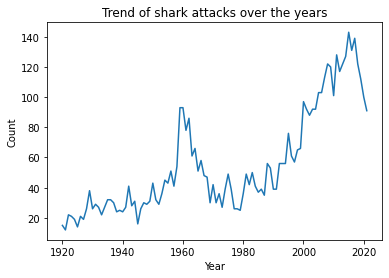

In [130]:
attacks_per_year=attacks_cleaned['Year'].value_counts()
sorted_attacks_per_year=attacks_per_year.sort_index()
plt.plot(sorted_attacks_per_year)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Trend of shark attacks over the years')

There exists the upwards trend over the years. There is a spike in 1960s and increase in the shark attacks reports since 1980s.
Let's see if the number of attacks and death associated with them increased evenly and if all attacks are fatal.

Text(0.5, 1.0, 'Fatality form the shark attack')

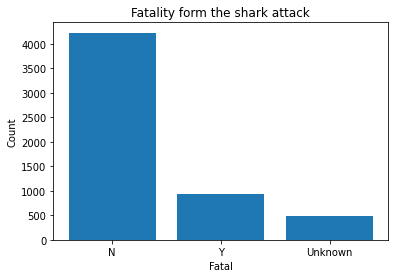

In [131]:
cat=attacks_cleaned['Fatal (Y/N)'].value_counts().index
count=attacks_cleaned['Fatal (Y/N)'].value_counts().values
plt.bar(cat,count)
plt.xlabel("Fatal")
plt.ylabel("Count")
plt.title('Fatality form the shark attack')

20% of all attacks are fatal

In [132]:
#including only 'yes' or 'no' entries
attacks_cleaned['Fatal']=attacks_cleaned[attacks_cleaned['Fatal (Y/N)'].isin(['Y','N'])]['Fatal (Y/N)']
# plotting the data
alt.data_transformers.disable_max_rows()
alt.Chart(attacks_cleaned[['Year','Fatal']].dropna()).mark_circle().encode(
    x = alt.X('Year', scale=alt.Scale(domain=[1920, 2020])),
    y='count()',
    color='Fatal'
).properties(
    width=800,
    height=300
)


alt.Chart(...)

There is an interesting pattern of increase of number of shark attacks. However, the deadly incidents associated with these attacks remain the same over the years. Number of fatal incidents has stayed below 20 cases per year for almost whole observed period.

##### Type of attacks 

In [133]:
attacks_cleaned['Type'].value_counts()

Unprovoked      4137
Provoked         554
Unknown          469
Watercraft       323
Sea Disaster     169
Name: Type, dtype: int64

One observation that would be interesting to see is the number of provoked cases that are fatal compared to others.

In [134]:
alt.Chart(attacks_cleaned[['Type','Fatal']].dropna()).mark_bar().encode(
    x='Type',
    y='count()',
    color='Fatal'
).properties(
    width=800,
    height=300
)

alt.Chart(...)

Almost none (!) of provoked cases are fatal. Potentially, this can be explained by the fact that only people who actively want to provoke shark are professionals who know how to avoid deadly injuries. Another interesting observation from here is that almost all shark attacks as the result of disaster are deadly. This can be due to the fact that sharks might be attracted by smell of blood from the injuries received during the disaster. However, in order to test this hypothesis we would need to explore injuries column that is outside of scope of this study.

##### Where did attack happpen?

In [135]:
attacks_cleaned['Country'].value_counts()

USA                    2188
AUSTRALIA              1189
SOUTH AFRICA            543
PAPUA NEW GUINEA        131
BAHAMAS                 116
                       ... 
COLOMBIA                  1
BRITISH WEST INDIES       1
ST KITTS / NEVIS          1
BANGLADESH                1
BRITISH ISLES             1
Name: Country, Length: 173, dtype: int64

There were reported 173 countries, where the attacks took place. For the purpose of this study, we are only interested in the most common locations (countries), where shark attacks are observed. We select countries with more than 55 cases of attacks in order to establish top 10 countries of these events.

In [136]:
cat_country = attacks_cleaned['Country'].value_counts().loc[lambda x : x > 55].index
count_country = attacks_cleaned['Country'].value_counts().loc[lambda x : x > 55].values

Plotting top 10 countries by shark attacks, sorted from left to right by the number of occurences

Text(0.5, 1.0, 'Top 10 countries by the amount of shark attacks')

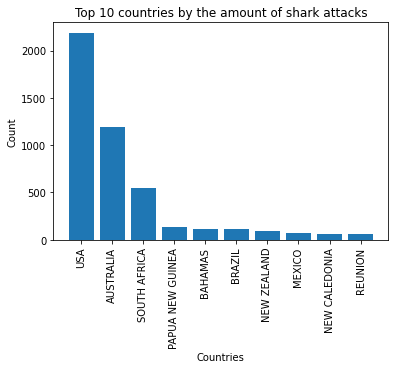

In [137]:
plt.xticks(rotation='vertical')
plt.bar(cat_country, count_country)
plt.xlabel("Countries")
plt.ylabel("Count")
plt.title('Top 10 countries by the amount of shark attacks')

We create a new variable that includes only these 10 countries and we will use it to observe the number of fatal incidents in these countries. 

In [138]:
#new variable
attacks_cleaned['Countries10']=attacks_cleaned[
    attacks_cleaned['Country'].isin(['USA','AUSTRALIA','SOUTH AFRICA', 'PAPUA NEW GUINEA',
                                     'BRAZIL','BAHAMAS','NEW ZEALAND','MEXICO','REUNION',
                                     'NEW CALEDONIA'])]['Country']
#plotting 
alt.data_transformers.disable_max_rows()
alt.Chart(attacks_cleaned[['Countries10','Fatal']].dropna()).mark_bar().encode(
    x = alt.X('Countries10',sort='-y'),
    y='count()',
    color='Fatal'
).properties(
    width=800,
    height=300
)


alt.Chart(...)

We observe that fatality is very low in all countries. Most fatal cases occur in Australia, whereas most attacks occur in USA.

##### What activities are the most dangerous?

In [139]:
attacks_cleaned['Activity'].value_counts()

Surfing                                                                               1357
Fishing                                                                               1086
Swimming                                                                               901
Diving                                                                                 461
Boarding                                                                               173
                                                                                      ... 
M.V. Tropical sank. Sole survivor rode oil drums for 8 days without food or water.       1
Investigating shark sighting                                                             1
Jumped into the water from a cliff                                                       1
boat with 46 people on board capsized                                                    1
Inflatable boat                                                                          1

Here, there are more than 400 reported activities during which the attack has happened. Therefore, we will select only activities that were reported more than 50 times and select 10 activities.

In [140]:
cat_activity=attacks_cleaned['Activity'].value_counts().loc[lambda x : x > 50].index
count_activity=attacks_cleaned['Activity'].value_counts().loc[lambda x : x > 50].values

Text(0.5, 1.0, 'Top 10 activities by the amount of shark attacks')

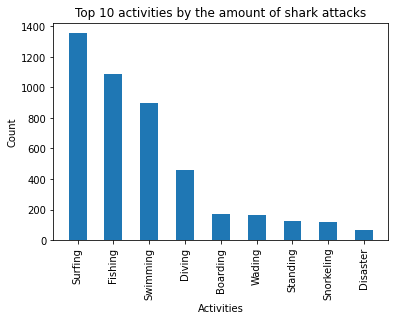

In [141]:
plt.xticks(rotation='vertical')
plt.bar(cat_activity, count_activity, width=0.5)
plt.xlabel("Activities")
plt.ylabel("Count")
plt.title('Top 10 activities by the amount of shark attacks')

Similarly to previous subsection, we will create a new variable and plot the outcome of sharks attack in relation to fatality for these 10 activities.

In [142]:
# new variable
attacks_cleaned['ActivityTop']=attacks_cleaned[
    attacks_cleaned['Activity'].isin(['Surfing','Fishing','Swimming','Wading','Diving','Standing','Snorkeling',
                                     'Boarding','Disaster'])]['Activity']
# plot
alt.Chart(attacks_cleaned[['ActivityTop','Fatal']].dropna()).mark_bar().encode(
    x = alt.X('ActivityTop',sort='-y'),
    y='count()',
    color='Fatal'
).properties(
    width=800,
    height=300
)

alt.Chart(...)

There exist an interesting pattern related to the activities. As seen before, surfing, fishing and swimming are the most common activities associated with shark attacks. Surfing has much higher occurence rate of attacks than swimming and fishing. However, swimming has a larger proportion fatalities from sharks attacks compared to surfing and other activities. Other activities, apart from disasters, have low occurence and fatality rates.

##### What  type of people attacked more often (sex and age)?

Text(0.5, 1.0, 'Sex of victims of shark attack')

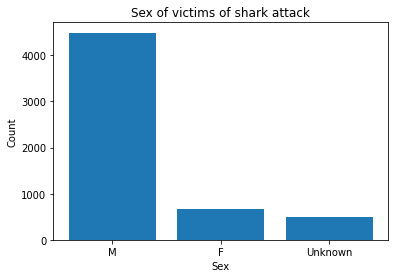

In [143]:
cat_sex=attacks_cleaned['Sex '].value_counts().index
count_sex=attacks_cleaned['Sex '].value_counts().values
plt.bar(cat_sex, count_sex)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title('Sex of victims of shark attack')

Males are more likely to be attacked. However, it is likely to be due the nature of activities that associated with shark attacks and their popularity among men, rather than sharks "taste" for males.

Text(0.5, 1.0, 'Age of victims of shark attack')

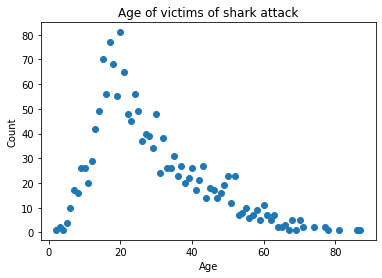

In [144]:
cat_age=attacks_cleaned['Age'].value_counts().sort_index().index
count_age=attacks_cleaned['Age'].value_counts().sort_index().values
plt.scatter(cat_age,count_age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Age of victims of shark attack')

There is a spike of shark attacks for people in their 20s. This also can be due to the fact that young people are more likely to be interested in those activities associated with shark attacks.

We will test these hypotheses regarding sex and age having some relationship with activities.

In [145]:
h1=alt.Chart(attacks_cleaned[['ActivityTop','Age']].dropna()).mark_bar().encode(
    x = alt.X('ActivityTop',sort='-y'),
    y='count()',
    color='Age'
).properties(
    width=800,
    height=300
)
h2=alt.Chart(attacks_cleaned[['ActivityTop','Sex ']].dropna()).mark_bar().encode(
    x = alt.X('ActivityTop',sort='-y'),
    y='count()',
    color='Sex '
).properties(
    width=800,
    height=300
)
h1&h2

alt.VConcatChart(...)

These graphs support statement above that younger people and males are more likely to participate in the activities associated with shark attacks. Therefore, we can drop age and sex for making final conclusion as they strongly associated with type of activities.

##### Daily trend of shark attacks

In [146]:
attacks_cleaned['Time'].value_counts().sort_index()

0.0       1
1.0       5
2.0       8
3.0      10
4.0       6
5.0       6
6.0      44
7.0      91
8.0     112
9.0     137
10.0    199
11.0    281
12.0    212
13.0    217
14.0    256
15.0    247
16.0    265
17.0    216
18.0    136
19.0     55
20.0     33
21.0      6
22.0      5
23.0      8
Name: Time, dtype: int64

(array([ 14.,  16.,  50., 340., 480., 429., 768., 352.,  88.,  19.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

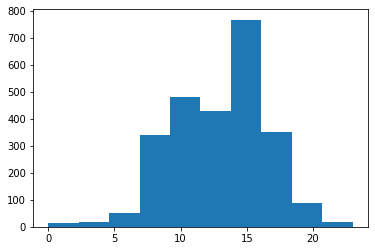

In [147]:
plt.hist(attacks_cleaned['Time'])

The distribution of attacks by hours has nothing interesting in terms of explanation of sharks behaviour, since these hours can be explained by hours people attend seaside. Most attacks occur after 3 pm which can be due to low visibility during the sunset. This statement is suported by https://www.surfertoday.com/surfing/why-when-and-how-do-sharks-attack-surfers#:~:text=Shark%20attacks%20are%20more%20likely,alone%20in%20shark%2Dinfested%20waters.

However, is there a seasonal distribution?


In [148]:
attacks_cleaned['Month'].value_counts().sort_index()

1.0     473
2.0     354
3.0     381
4.0     428
5.0     370
6.0     465
7.0     629
8.0     570
9.0     517
10.0    421
11.0    378
12.0    399
Name: Month, dtype: int64

In [149]:
alt.Chart(attacks_cleaned[['Month','Fatal']].dropna()).mark_bar(size=20).encode(
    x = 'Month',
    y='count()',
    color='Fatal').properties(
    width=800,
    height=300
)

alt.Chart(...)

As expected, more attacks are happening in summer months, when more people go on holidays to the seaside. However, fatality remains almost the same thoughout the whole year. This shows that there is no strong relationship to seasonality. 

##### What species attack?

In [150]:
attacks_cleaned['Species '].value_counts()

White shark                                                       697
Shark involvement not confirmed                                   349
Tiger shark                                                       291
Bull shark                                                        230
Blacktip shark                                                    120
                                                                 ... 
Grey reef shark, 1.5 m                                              1
20' shark                                                           1
24" to 30" shark                                                    1
136-kg [300-lb] shark                                               1
2 days later a 600-lb shark was caught 100 yards from the site      1
Name: Species , Length: 529, dtype: int64

We take entries that have more than 50 occurences as the number of entries in Species column remains very large

Text(0.5, 1.0, 'Top shark species involved in the attacks')

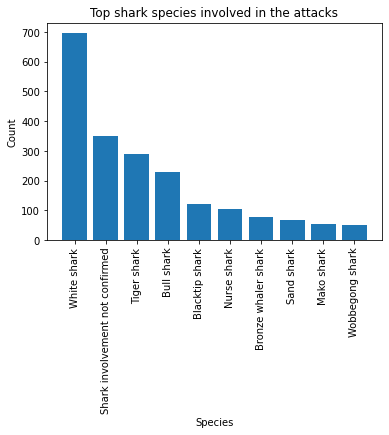

In [151]:
cat_species=attacks_cleaned['Species '].value_counts().loc[lambda x : x > 50].index
count_species=attacks_cleaned['Species '].value_counts().loc[lambda x : x > 50].values
plt.xticks(rotation='vertical')
plt.bar(cat_species,count_species)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title('Top shark species involved in the attacks')

Only 9 types of sharks were actually identified. According to the website below, there are over 500 shark species. Therefore, less than 2% of all sharks is associated with shark attacks. There are also lots of events where shark involvement was not confirmed. Moreover, some entries in the orginal data had recording mentioning finding a shark tooth, however this does not prove that the attack that led to injuries was created by shark. 
https://ocean.si.edu/ocean-life/sharks-rays/sharks#:~:text=500%2B%20Species,-Sharks%20come%20in&text=With%20over%20500%20species%20of,39%20feet%20(12%20meters).

Now let's see what of type of shark is the most deadly

In [152]:
attacks_cleaned['Species10']=attacks_cleaned[
    attacks_cleaned['Species '].isin(['White shark','Bull shark','Tiger shark',
                                      'Shark involvement not confirmed','Blacktip shark','Nurse shark',
                                     'Bronze whaler shark','Sand shark','Mako shark','Wobbegong shark'])]['Species ']
alt.Chart(attacks_cleaned[['Species10','Fatal']].dropna()).mark_bar().encode(
    x = alt.X('Species10',sort='-y'),
    y='count()',
    color='Fatal'
).properties(
    width=800,
    height=300
)

alt.Chart(...)

Only three types of sharks (white, tiger and bull) are associated with fatal cases of shark attacks. This is less than 1% of all sharks. 

### Step 6. Data derivation 

In order to make some conclusion, we want to see percentage of all fatal to non-fatal attacks for features that we did not eliminate as non-informative as the result of analysis. These three features are Countries, Activity and Species

In [153]:
# Species
sp=attacks_cleaned.groupby(['Species10','Fatal'])['Year'].count()
sp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Species10                        Fatal
Blacktip shark                   N        100.000000
Bronze whaler shark              N         93.421053
                                 Y          6.578947
Bull shark                       N         80.434783
                                 Y         19.565217
Mako shark                       N         94.545455
                                 Y          5.454545
Nurse shark                      N        100.000000
Sand shark                       N        100.000000
Shark involvement not confirmed  N         78.571429
                                 Y         21.428571
Tiger shark                      N         76.041667
                                 Y         23.958333
White shark                      N         77.826725
                                 Y         22.173275
Wobbegong shark                  N        100.000000
Name: Year, dtype: float64

In [154]:
# Activity
act=attacks_cleaned.groupby(['ActivityTop','Fatal'])['Year'].count()
act.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

ActivityTop  Fatal
Boarding     N        85.714286
             Y        14.285714
Disaster     N        31.481481
             Y        68.518519
Diving       N        75.980392
             Y        24.019608
Fishing      N        86.995074
             Y        13.004926
Snorkeling   N        86.725664
             Y        13.274336
Standing     N        88.333333
             Y        11.666667
Surfing      N        93.937068
             Y         6.062932
Swimming     N        67.076167
             Y        32.923833
Wading       N        92.763158
             Y         7.236842
Name: Year, dtype: float64

In [155]:
# Country
coun=attacks_cleaned.groupby(['Countries10','Fatal'])['Year'].count()
coun.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Countries10       Fatal
AUSTRALIA         N        81.683626
                  Y        18.316374
BAHAMAS           N        95.454545
                  Y         4.545455
BRAZIL            N        65.048544
                  Y        34.951456
MEXICO            N        54.411765
                  Y        45.588235
NEW CALEDONIA     N        66.071429
                  Y        33.928571
NEW ZEALAND       N        89.010989
                  Y        10.989011
PAPUA NEW GUINEA  N        56.692913
                  Y        43.307087
REUNION           N        53.571429
                  Y        46.428571
SOUTH AFRICA      N        83.950617
                  Y        16.049383
USA               N        94.582505
                  Y         5.417495
Name: Year, dtype: float64

# Conclusion

### Summary of the results:
Observing three final features individually we can make the following conclusions:
1. Activity: The most popular activity recorded in the dataset was surfing, however the fatality was only 6%, which is relatively low. On the other hand, swimming was only third most recorded activity in the dataset, however it had the highest percentage of fatal cases of around 33%. 
2. Country: USA was the country with most shark attacks recorded, however the death rate was one of the lowest, 5%, among all other countries. Austrilia is the country with the largest amount of death from shark attacks, with 18% of all attacks. Other countries, despite showing large percentage of death from shark attacks, have very low count of such events. 
3. Species: 4 of all analysed shark species had no cases of fatal incidents recorded. Other two had very small count and percentage of fatality. Only three sharks are associated with large number of cases and high percentage of them being fatal. White shark had the largest occurence of attacks, however the highest percentage of fatalities is associated with tiger shark.

This project shows the true rarity of fatal cases from shark attacks with support of visualisations and analysis. One major limitation of this project in order to fulfill the initial goal is the lack of the data on the shark attacks compared to other events causing disturbance to everyday life. This can be a topic for other project, it can be achived by obtaining more metadata on these events.

One of the most important conclusions made by conducting this study is the significance of data cleaning. The results that were obtained without data cleaning (not stated in the report or notebook), were not informative and lacking space for analysis.  